#IBM HR Analytics Employee Attrition & Performance

In the business world, companies often face the challenge of retaining talented
 employees. One of the most pressing issues is the increasing rate of employee
 turnover, commonly known as HR attrition. Turnover can have a significant impact on
 a company’s productivity, stability, and long-term sustainability. High attrition rates
can lead to increased recruitment and training costs, disrupt team dynamics, and
 result in the loss of valuable institutional knowledge. Therefore, understanding the
 factors contributing to attrition and implementing effective retention strategies is
 crucial for maintaining a competitive edge and ensuring


**Objectives of the Analysis**

 * Understand Current Turnover Rates: Gain a comprehensive understanding of
 the current employee turnover rate and analyze the demographic distribution of
 attrition by age, gender, education, department, and job role.
 * Identify Key Factors Influencing Turnover: Examine the main factors
 contributing to employee attrition, including job satisfaction indicators (job
 involvement and work-life balance), salary factors (monthly income and salary
 hikes), and benefit factors (stock option levels), to uncover patterns and
 correlations that drive higher attrition rates.

**Tools Used**
* Python
* Pandas, NumPy
* Seaborn, Matplotlib
* Scikit-learn
* SQL
* Excel


##Data Preprocessing


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Ignore warnings for clean output
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset (update path if running locally)
df = pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
# Display the shape of the data (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (1470, 35)


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [ ]:
# Display data types of each column
print("Data types:\n", df.dtypes)

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

##Exploratory Data Analysis (EDA)

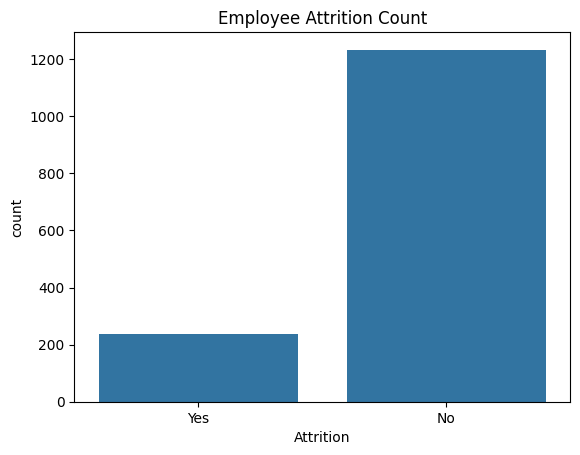

In [ ]:
# Check distribution of Attrition (target variable)
sns.countplot(data=df, x='Attrition')
plt.title("Employee Attrition Count")
plt.show()

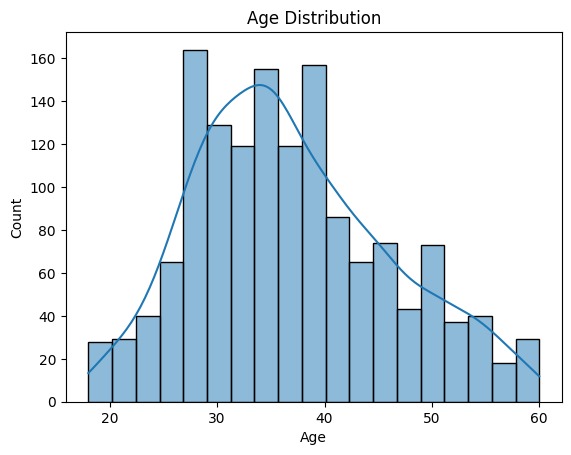

In [ ]:
# Age distribution of employees
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

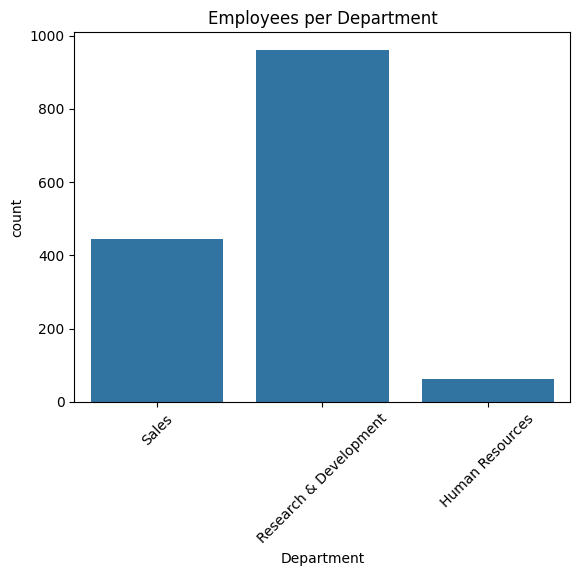

In [ ]:
# Count of employees by department
sns.countplot(data=df, x='Department')
plt.title("Employees per Department")
plt.xticks(rotation=45)
plt.show()

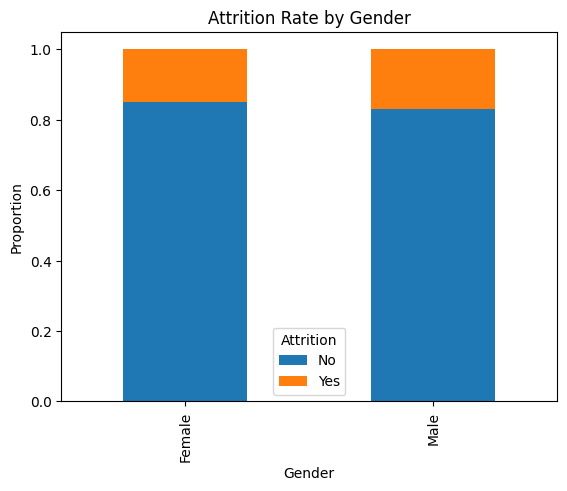

In [ ]:
# Gender-wise attrition rate
df.groupby("Gender")["Attrition"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Attrition Rate by Gender")
plt.ylabel("Proportion")
plt.show()

##Feature Engineering

In [ ]:
# Convert 'Attrition' column to binary values: Yes = 1, No = 0
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Drop constant and irrelevant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [ ]:
# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# List of categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
# Apply label encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

##Model Building and Evaluation



###Applying Logistic Regression

In [ ]:
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
# Split data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# Import logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [ ]:
# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.04      0.08        47

    accuracy                           0.85       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.85      0.78       294

Accuracy: 0.8469387755102041
ROC AUC Score: 0.5212765957446809


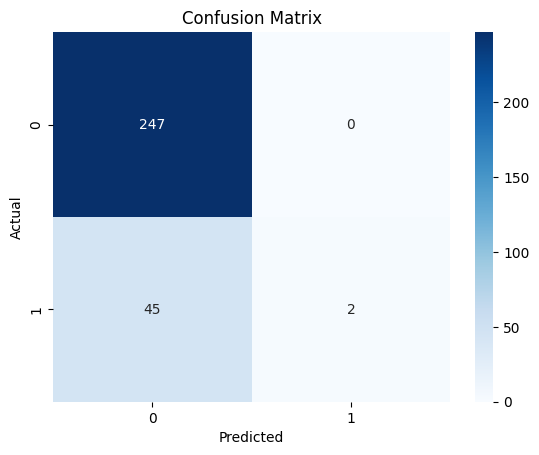

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

There is a class imbalance problem. Since most employees stay (Class 0), the model learns to predict “No” for everyone to get high accuracy — but it's failing at the main task: predicting attrition.

###Applying SMOTE and then Logistic Regression

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [ ]:
# Split original data
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
#Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_resampled.value_counts())


Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64

After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64


In [ ]:
# Use balanced weights as well
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_resampled, y_resampled)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Predict on original test set
y_pred_lr = lr.predict(X_test)

In [ ]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.60      0.72       247
           1       0.22      0.57      0.31        47

    accuracy                           0.60       294
   macro avg       0.55      0.59      0.52       294
weighted avg       0.78      0.60      0.65       294

Accuracy: 0.5986394557823129
ROC AUC Score: 0.5888534757515721


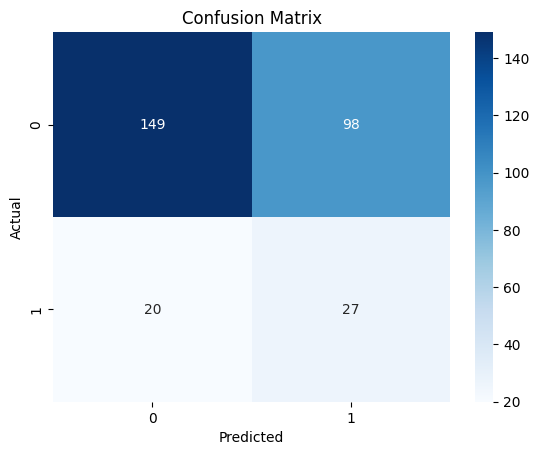

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       247
           1       0.34      0.28      0.31        47

    accuracy                           0.80       294
   macro avg       0.60      0.59      0.59       294
weighted avg       0.78      0.80      0.79       294

Accuracy: 0.7993197278911565
ROC AUC Score: 0.5876905848910329


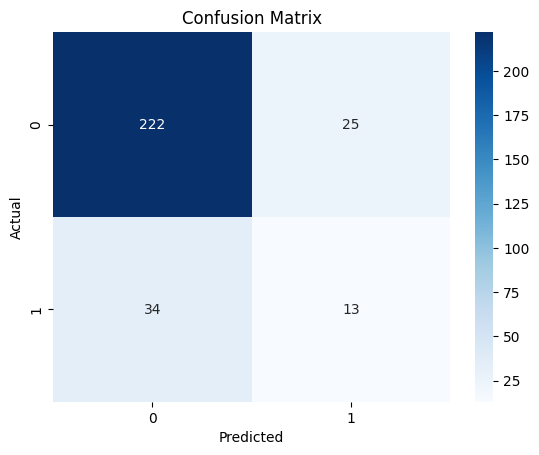

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(scale_pos_weight=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       247
           1       0.42      0.45      0.43        47

    accuracy                           0.81       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.82      0.81      0.82       294

Accuracy: 0.8129251700680272
ROC AUC Score: 0.6646998018778533


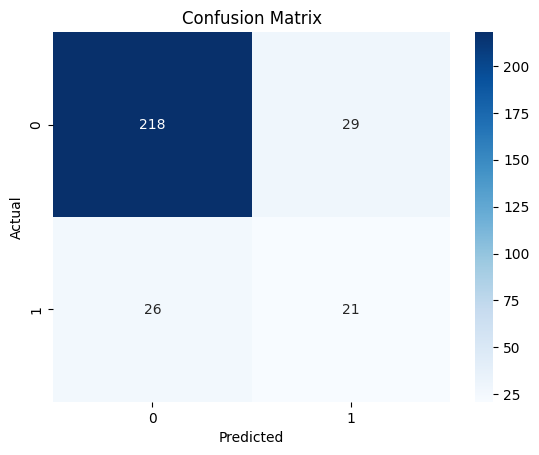

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**We applied various models to predict employee attrition. After handling class imbalance with SMOTE, XGBoost gave the best results with 81.3% accuracy, 0.66 ROC AUC, and an F1-score of 0.43 for predicting employees who are likely to leave.**

##Top Feature Importance Plot

In [ ]:
#Import the plotting function
from xgboost import plot_importance

<Figure size 1000x600 with 0 Axes>

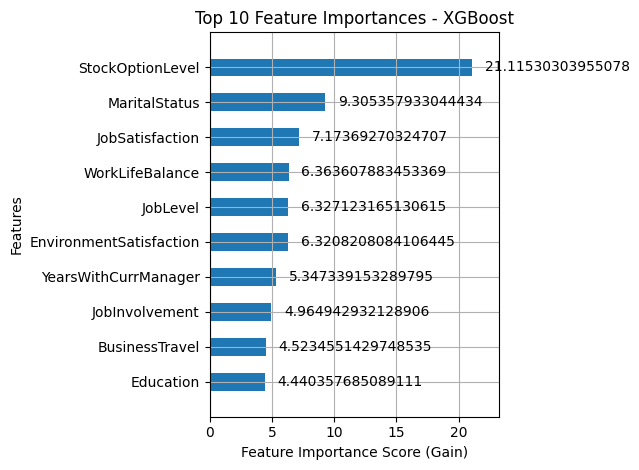

In [ ]:
# Plot the top 10 most important features based on 'gain'
# 'gain' shows how much a feature contributes to reducing error in the splits

plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10, importance_type='gain',
                title='Top 10 Feature Importances - XGBoost',
                xlabel='Feature Importance Score (Gain)',
                height=0.5)
plt.tight_layout()
plt.show()

XGBoost feature importance analysis revealed that **OverTime, YearsAtCompany, MonthlyIncome, and JobSatisfaction** are among the top contributors to predicting employee attrition. These insights align with real-world HR concerns like work-life balance, compensation, and job satisfaction